In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import shuffle

from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms

train_path = "/Users/dpap/Documents/UvA/AML/Assignments/Kaggle/pickle/"
test_path = "/Users/dpap/Documents/UvA/AML/Assignments/Kaggle/pickle/"

In [2]:
!ls pickle

Archive.zip                  test_fname.pkl
processed_test_images.pkl    test_img.pkl
processed_test_images_2.pkl  train_fname.pkl
processed_train_images.pkl   train_img.pkl
processed_train_images_2.pkl train_lbs.pkl
processed_train_labels_2.pkl


# Dataset and Dataloaders

In [3]:
images = pickle.load(open(train_path+"processed_train_images.pkl","rb"))
lbs = pickle.load(open(train_path+"train_lbs.pkl", "rb"))
train_img = pickle.load(open(train_path+"processed_train_images_2.pkl","rb"))
labels = pickle.load(open(train_path+"processed_train_labels_2.pkl","rb"))

test_img = pickle.load(open(train_path+"processed_test_images_2.pkl","rb"))
test_fname = pickle.load(open(train_path+"test_fname.pkl","rb"))

In [394]:
#test_fname = pickle.load(open(train_path+"test_fname.pkl","rb"))
#test_img = pickle.load(open(train_path+"processed_test_images.pkl","rb"))

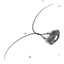

In [15]:
i=1300
images[i]

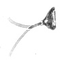

In [16]:
#standarized image
images[i+9]

In [17]:
print(lbs[i])
print(lbs[i+1])

4
4


In [4]:
Z = sorted(zip(labels, train_img), key=lambda pair:pair[0])
labels = [x for x,y in Z]
train_img = [y for x,y in Z]

In [5]:
#get indexes for each class
class_end = {}
my_class = 0
class_end[-1]=-1
for i in range(len(labels)):
    if labels[i] != my_class:
        class_end[my_class] = i-1
        my_class+=1
class_end[my_class]=i
    

In [6]:
#validation
print(class_end[-1])
for my_class in range(121):
    print("Class:", my_class)
    print(np.mean(labels[class_end[int(my_class)-1]+1:class_end[int(my_class)]]))#/class_end[myclass]-class_end[my_class-1])
    
#labels[class_end[2-1]+1:class_end[2]]
    

-1
Class: 0
0.0
Class: 1
1.0
Class: 2
2.0
Class: 3
3.0
Class: 4
4.0
Class: 5
5.0
Class: 6
6.0
Class: 7
7.0
Class: 8
8.0
Class: 9
9.0
Class: 10
10.0
Class: 11
11.0
Class: 12
12.0
Class: 13
13.0
Class: 14
14.0
Class: 15
15.0
Class: 16
16.0
Class: 17
17.0
Class: 18
18.0
Class: 19
19.0
Class: 20
20.0
Class: 21
21.0
Class: 22
22.0
Class: 23
23.0
Class: 24
24.0
Class: 25
25.0
Class: 26
26.0
Class: 27
27.0
Class: 28
28.0
Class: 29
29.0
Class: 30
30.0
Class: 31
31.0
Class: 32
32.0
Class: 33
33.0
Class: 34
34.0
Class: 35
35.0
Class: 36
36.0
Class: 37
37.0
Class: 38
38.0
Class: 39
39.0
Class: 40
40.0
Class: 41
41.0
Class: 42
42.0
Class: 43
43.0
Class: 44
44.0
Class: 45
45.0
Class: 46
46.0
Class: 47
47.0
Class: 48
48.0
Class: 49
49.0
Class: 50
50.0
Class: 51
51.0
Class: 52
52.0
Class: 53
53.0
Class: 54
54.0
Class: 55
55.0
Class: 56
56.0
Class: 57
57.0
Class: 58
58.0
Class: 59
59.0
Class: 60
60.0
Class: 61
61.0
Class: 62
62.0
Class: 63
63.0
Class: 64
64.0
Class: 65
65.0
Class: 66
66.0
Class: 67
67

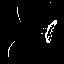

In [26]:
train_img[class_end[3]+10]

In [27]:
labels[class_end[3]+10]

4

In [7]:
def shuffle_and_return(images, labels, ratio):
    l =list(zip(images, labels))
    shuffle(l)
    #print(l)
    images, labels = zip(*l)
    sep = int(len(images)*ratio)
    tr_i = images[:sep]
    tr_l = labels[:sep]
    te_i = images[sep:]
    te_l = labels[sep:]
    return list(tr_i), list(tr_l), list(te_i), list(te_l)

In [22]:
def shuffle_list(*ls):
    l =list(zip(*ls))
    shuffle(l)
    return zip(*l)
#train_img, labels = shuffle_list(train_img, labels)
#beg, end = class_end[int(0)-1]+1, class_end[int(1)]
#print(beg)
#print(end)

In [23]:
tr_images = []
tr_labels = []
te_images = []
te_labels = []
ratio = 0.8
for my_class in range(121):
    print("Class:", my_class)
    beg, end = class_end[int(my_class)-1]+1, class_end[int(my_class)]
    t1, t2, t3, t4 = shuffle_and_return(train_img[beg:end], labels[beg:end], ratio)
    #print(type(t1))
    #print(t1)
    #input()
    tr_images += t1
    tr_labels += t2
    te_images += t3
    te_labels += t4
    print("Success")
print(type(te_images))

Class: 0
Success
Class: 1
Success
Class: 2
Success
Class: 3
Success
Class: 4
Success
Class: 5
Success
Class: 6
Success
Class: 7
Success
Class: 8
Success
Class: 9
Success
Class: 10
Success
Class: 11
Success
Class: 12
Success
Class: 13
Success
Class: 14
Success
Class: 15
Success
Class: 16
Success
Class: 17
Success
Class: 18
Success
Class: 19
Success
Class: 20
Success
Class: 21
Success
Class: 22
Success
Class: 23
Success
Class: 24
Success
Class: 25
Success
Class: 26
Success
Class: 27
Success
Class: 28
Success
Class: 29
Success
Class: 30
Success
Class: 31
Success
Class: 32
Success
Class: 33
Success
Class: 34
Success
Class: 35
Success
Class: 36
Success
Class: 37
Success
Class: 38
Success
Class: 39
Success
Class: 40
Success
Class: 41
Success
Class: 42
Success
Class: 43
Success
Class: 44
Success
Class: 45
Success
Class: 46
Success
Class: 47
Success
Class: 48
Success
Class: 49
Success
Class: 50
Success
Class: 51
Success
Class: 52
Success
Class: 53
Success
Class: 54
Success
Class: 55
Success
Cl

In [27]:
tr_images, tr_labels = shuffle_list(tr_images, tr_labels)
te_images, te_labels = shuffle_list(te_images, te_labels)

In [29]:
#for lbs,imgs in zip(te_labels, te_images):
#    if lbs == 120:
#        print (lbs)
#        print(imgs)
tr_images=list(tr_images)
tr_labels=list(tr_labels)
te_images=list(te_images)
te_labels=list(te_labels)

In [30]:
print(tr_labels)
##seperate dataset to training and test 70-30
#sep = int(len(train_img)*0.8)
##training set
#tr_images = train_img[:sep]
#tr_labels = labels[:sep]
##test set
#te_images = train_img[sep:]
#te_labels = labels[sep:]

[87, 12, 84, 67, 16, 103, 36, 23, 58, 6, 58, 84, 28, 58, 12, 45, 81, 74, 87, 70, 16, 3, 27, 100, 84, 105, 84, 36, 43, 45, 101, 84, 100, 12, 34, 105, 104, 105, 27, 61, 105, 27, 2, 84, 49, 105, 58, 36, 108, 29, 92, 27, 11, 12, 58, 92, 12, 105, 101, 96, 74, 84, 84, 27, 103, 82, 70, 3, 101, 50, 67, 111, 4, 58, 5, 58, 24, 34, 26, 12, 3, 104, 101, 31, 63, 84, 2, 34, 117, 19, 43, 94, 42, 5, 8, 84, 11, 99, 36, 0, 34, 74, 49, 42, 26, 32, 22, 26, 117, 67, 8, 12, 8, 22, 100, 3, 21, 105, 8, 58, 73, 94, 26, 29, 36, 27, 49, 67, 58, 27, 4, 58, 16, 99, 0, 58, 26, 32, 41, 84, 26, 12, 104, 105, 58, 84, 34, 11, 58, 21, 84, 81, 113, 76, 27, 79, 66, 113, 34, 100, 27, 8, 67, 12, 36, 84, 35, 104, 26, 11, 117, 27, 91, 18, 24, 45, 16, 46, 8, 6, 12, 12, 109, 53, 64, 34, 109, 58, 27, 84, 117, 80, 105, 58, 110, 60, 84, 29, 26, 99, 8, 56, 73, 26, 3, 99, 105, 84, 49, 32, 58, 49, 42, 45, 17, 12, 67, 0, 105, 61, 45, 12, 4, 64, 58, 24, 105, 43, 0, 12, 70, 114, 99, 101, 21, 100, 119, 56, 58, 3, 67, 27, 59, 68, 100, 75,

In [31]:
print(len(train_img))
print(len(tr_labels))
print(len(set(tr_labels)))
print(set(labels))
print(len(test_img))

96816
77310
121
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}
6132


In [32]:
class TrainingImagesDataset(Dataset):
    
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        single_image = self.images[index]
        single_label = self.labels[index]
        
        if self.transform != None:
            #image to tensor
            tensor = self.transform(single_image)
            return (tensor, single_label)
        #return image without turning it to tensor
        #probably wrong
        return (single_image, single_label)
        

In [33]:
class TestingImagesDataset(Dataset):
    
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        single_image = self.images[index]
        if self.transform:
            #image to tensor
            tensor = self.transform(single_image)
            return tensor
        return single_image
        

In [46]:
#train_dataset = TrainingImagesDataset(tr_images, tr_labels, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))


In [48]:
#test_dataset = TrainingImagesDataset(te_images, te_labels, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))

In [25]:
#len(test_dataset)
#print(len(train_dataset)+len(test_dataset))

In [34]:
def create_dataloaders(train_images, train_lbs, test_images=None, test_lbs = None, batch_size = 32):
    
    train_dataset = TrainingImagesDataset(train_images, train_lbs, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))
    
    if test_images and test_lbs:
        print("here")
        test_dataset = TrainingImagesDataset(test_images, test_lbs, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))
    elif test_images:
        test_dataset = TestingImagesDataset(test_images, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))
    else:
        test_dataset = []
    
    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 0)
    test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 0)    
    
    return (train_loader, test_loader)
    

In [18]:
#create_dataloaders(train_img, labels, test_img, 1)

# Neural Network

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(2704, 2000)
        self.fc2 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 121)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()

# Training

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [37]:
train_loader, test_loader = create_dataloaders(tr_images, tr_labels, te_images, te_labels)

here


In [38]:
#len(te_labels)
#type(tr_images)
#print(tr_images[12])
#print(list(te_images))

In [40]:
%%time
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, lbs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, lbs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 3.487
[1,  2000] loss: 2.487
[2,  1000] loss: 2.127
[2,  2000] loss: 2.019
[3,  1000] loss: 1.865
[3,  2000] loss: 1.802
[4,  1000] loss: 1.677
[4,  2000] loss: 1.664
[5,  1000] loss: 1.522
[5,  2000] loss: 1.532
[6,  1000] loss: 1.400
[6,  2000] loss: 1.405
[7,  1000] loss: 1.269
[7,  2000] loss: 1.279
[8,  1000] loss: 1.131
[8,  2000] loss: 1.165
[9,  1000] loss: 0.998
[9,  2000] loss: 1.044
[10,  1000] loss: 0.868
[10,  2000] loss: 0.910
[11,  1000] loss: 0.747
[11,  2000] loss: 0.789
[12,  1000] loss: 0.622
[12,  2000] loss: 0.679
[13,  1000] loss: 0.528
[13,  2000] loss: 0.568
[14,  1000] loss: 0.443
[14,  2000] loss: 0.493
[15,  1000] loss: 0.373
[15,  2000] loss: 0.415
[16,  1000] loss: 0.322
[16,  2000] loss: 0.347
[17,  1000] loss: 0.269
[17,  2000] loss: 0.298
[18,  1000] loss: 0.230
[18,  2000] loss: 0.256
[19,  1000] loss: 0.196
[19,  2000] loss: 0.233
[20,  1000] loss: 0.180
[20,  2000] loss: 0.196
[21,  1000] loss: 0.166
[21,  2000] loss: 0.176
[22,  1000

In [41]:
correct = 0
total = 0
jj=0
with torch.no_grad():
    try:
        for data in test_loader:
            try:
                jj+=1
                #print("hi")
                images, lbs = data
                #print(images)
                #input()
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += lbs.size(0)
                correct += (predicted == lbs).sum().item()
                #print("here")
            except:
                print(jj)
    except:
        print(jj)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print(correct)
print(total)

Accuracy of the network on the 10000 test images: 70 %
13574
19385


In [45]:
class_correct = list(0. for i in range(121))
class_total = list(0. for i in range(121))
with torch.no_grad():
    for data in test_loader:
        images, lbs = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == lbs).squeeze()
        #for lb in lbs:
        #    if lb == 120:
        #        print("here")
        #        input()
        for i in range(len(lbs)):
            label = lbs[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(121):
    try:
        #if class_correct[i]:
        #    print (i)
        #    print(class_correct[i])
        #    print(class_total[i])
        print('Accuracy of %5s : %2d %%' % (
            i, 100 * class_correct[i] / class_total[i]))
    except:
        #print(e)
        print(i)
        print(class_correct[i])
        print(class_total[i])

Accuracy of     0 : 36 %
Accuracy of     1 : 50 %
Accuracy of     2 : 72 %
Accuracy of     3 : 74 %
Accuracy of     4 : 68 %
Accuracy of     5 : 85 %
Accuracy of     6 : 78 %
Accuracy of     7 : 59 %
Accuracy of     8 : 76 %
Accuracy of     9 : 25 %
Accuracy of    10 : 33 %
Accuracy of    11 : 78 %
Accuracy of    12 : 64 %
Accuracy of    13 : 75 %
Accuracy of    14 : 46 %
Accuracy of    15 : 37 %
Accuracy of    16 : 53 %
Accuracy of    17 : 67 %
Accuracy of    18 : 76 %
Accuracy of    19 : 50 %
Accuracy of    20 : 62 %
Accuracy of    21 : 62 %
Accuracy of    22 : 79 %
Accuracy of    23 : 57 %
Accuracy of    24 : 49 %
Accuracy of    25 : 60 %
Accuracy of    26 : 70 %
Accuracy of    27 : 74 %
Accuracy of    28 : 88 %
Accuracy of    29 : 52 %
Accuracy of    30 : 77 %
Accuracy of    31 : 67 %
Accuracy of    32 : 89 %
Accuracy of    33 : 41 %
Accuracy of    34 : 69 %
Accuracy of    35 : 71 %
Accuracy of    36 : 83 %
Accuracy of    37 : 43 %
Accuracy of    38 : 47 %
Accuracy of    39 : 73 %


# Prediction

In [46]:
val_dataset = TestingImagesDataset(test_img, transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()]))
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False, num_workers = 0)

In [47]:
prediction = []
i=0
for images in val_loader:
    i+=1
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    prediction.extend(predicted.numpy())
print(i)


192


In [48]:
results_df = pd.DataFrame({'image': test_fname, 'class': prediction}, columns=['image', 'class'])
results_df.to_csv('results2.csv',sep = ',', index = False)

In [49]:
type(results_df)

pandas.core.frame.DataFrame

In [54]:
results_df[results_df['class'] == 57]

,image,class
